#In this project, I have tried to answer why the Fire-Boltt Phoenix Pro 1.39" Bluetooth Calling Smartwatch is a bestseller on Amazon with 77,889 reviews. What attracts the consumers? Is what is the Key Reasons .

## I have used Natural Language Processing to understand the sentiment behind the purchases and the reasons why it's popular."
### product Link[link text](https://www.amazon.in/Fire-Boltt-Bluetooth-Smartwatch-Assistant-Monitoring/dp/B0BRKXXPZ7/ref=zg_bs_g_11599648031_sccl_2/257-6110824-6465264?th=1)

## The Data Used In The Project was Collected by me using DataMiner Automatic Data Sctaping Tool .

### This project can be used as an Example by product developers, Manufacturing teams , App Feature Developers,Cheaf Officers to understand what attracts Indian consumers looking to buy a smartwatch.

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [114]:
data = pd.read_excel('/content/Amazon_Smart Watch Review_Data__ (1).xlsx')
data.head()

,Name,Rating,Review Title,Review Place,Review Date,Review Content
0,Sathyan|Sathyan,4.0 out of 5 stars,Buy a wonderful smart in better price,Reviewed in India,21 July 2023,As the world of technology continues to evolve...
1,Indranil Modak|Indranil Modak,4.0 out of 5 stars,Comfortable ordinary smart watch,Reviewed in India,3 August 2023,"Brightness is okay, no double tap wake up scre..."
2,RITHIK|RITHIK,4.0 out of 5 stars,Best in the price range,Reviewed in India,3 August 2023,Looks classy and worth for 1500 best in the bu...
3,Ashwatha Raj,4.0 out of 5 stars,Features,Reviewed in India,4 August 2023,I liked the build quality and the features are...
4,Sireesh kumar,4.0 out of 5 stars,Very Nice and Good Value for Prodoct..,Reviewed in India,17 July 2023,The Fire-Boltt Phoenix Pro has a good features...


In [115]:
data.isnull()

,Name,Rating,Review Title,Review Place,Review Date,Review Content
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
95,False,False,False,False,False,False
96,False,False,False,False,False,False
97,False,False,False,False,False,False
98,False,False,False,False,False,False


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            100 non-null    object
 1   Rating          100 non-null    object
 2   Review Title    100 non-null    object
 3   Review Place    100 non-null    object
 4   Review Date     100 non-null    object
 5   Review Content  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [117]:
data.describe()

,Name,Rating,Review Title,Review Place,Review Date,Review Content
count,100,100,100,100,100,100
unique,100,3,91,1,34,100
top,Sathyan|Sathyan,4.0 out of 5 stars,Good product,Reviewed in India,17 July 2023,As the world of technology continues to evolve...
freq,1,98,6,100,9,1


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            100 non-null    object
 1   Rating          100 non-null    object
 2   Review Title    100 non-null    object
 3   Review Place    100 non-null    object
 4   Review Date     100 non-null    object
 5   Review Content  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [119]:
# Rename the columns
data.rename(columns={
    'Name': 'Customer_Name',
    'Rating': 'Customer_Rating',
    'Review Title': 'Review_Title',
    'Review Place': 'Review_Location',
    'Review Date': 'Review_Date',
    'Review Content': 'Review_Content'
}, inplace=True)

In [120]:
# Defined and mapping of month names to numerical representation
month_mapping = {
    'January': '1',
    'February': '2',
    'March': '3',
    'April': '4',
    'May': '5',
    'June': '6',
    'July': '7',
    'August': '8',
    'September': '9',
    'October': '10',
    'November': '11',
    'December': '12'
}

# Function to convert month names to numerical representation
def convert_month_name_to_number(date_str):
    for month_name, month_number in month_mapping.items():
        date_str = date_str.replace(month_name, month_number)
    # Remove the extra space at the beginning of the date string
    return date_str.strip()

# Apply the function to the "Review_Date" column to convert month names to numerical representation
data['Review_Date'] = data['Review_Date'].apply(convert_month_name_to_number)



In [121]:
# Convert the "Review_Date" column to datetime format
data['Review_Date'] = pd.to_datetime(data['Review_Date'], format='%d %m %Y', errors='coerce')


In [122]:
# Optionally, you can change the display format of the dates in the DataFrame
data['Review_Date'] = data['Review_Date'].dt.strftime('%d-%m-%Y')

In [123]:
data.head()

,Customer_Name,Customer_Rating,Review_Title,Review_Location,Review_Date,Review_Content
0,Sathyan|Sathyan,4.0 out of 5 stars,Buy a wonderful smart in better price,Reviewed in India,21-07-2023,As the world of technology continues to evolve...
1,Indranil Modak|Indranil Modak,4.0 out of 5 stars,Comfortable ordinary smart watch,Reviewed in India,03-08-2023,"Brightness is okay, no double tap wake up scre..."
2,RITHIK|RITHIK,4.0 out of 5 stars,Best in the price range,Reviewed in India,03-08-2023,Looks classy and worth for 1500 best in the bu...
3,Ashwatha Raj,4.0 out of 5 stars,Features,Reviewed in India,04-08-2023,I liked the build quality and the features are...
4,Sireesh kumar,4.0 out of 5 stars,Very Nice and Good Value for Prodoct..,Reviewed in India,17-07-2023,The Fire-Boltt Phoenix Pro has a good features...


In [124]:
data['Customer_Rating']

0     4.0 out of 5 stars
1     4.0 out of 5 stars
2     4.0 out of 5 stars
3     4.0 out of 5 stars
4     4.0 out of 5 stars
             ...        
95    4.0 out of 5 stars
96    4.0 out of 5 stars
97    4.0 out of 5 stars
98    4.0 out of 5 stars
99    4.0 out of 5 stars
Name: Customer_Rating, Length: 100, dtype: object

In [125]:
# Function to extract numeric rating from string
def extract_numeric_rating(rating_str):
    parts = rating_str.split()
    if len(parts) >= 1:
        return float(parts[0])  # Extract the first part as a floating-point number
    return None

# Convert the 'Customer_Rating' column to numeric
data['Numeric_Rating'] = data['Customer_Rating'].apply(extract_numeric_rating)

# Display the transformed data
print(data[['Customer_Rating', 'Numeric_Rating']])


       Customer_Rating  Numeric_Rating
0   4.0 out of 5 stars             4.0
1   4.0 out of 5 stars             4.0
2   4.0 out of 5 stars             4.0
3   4.0 out of 5 stars             4.0
4   4.0 out of 5 stars             4.0
..                 ...             ...
95  4.0 out of 5 stars             4.0
96  4.0 out of 5 stars             4.0
97  4.0 out of 5 stars             4.0
98  4.0 out of 5 stars             4.0
99  4.0 out of 5 stars             4.0

[100 rows x 2 columns]


In [126]:
data['Numeric_Rating'][46]

3.0

In [168]:
data.head(5)

,Customer_Name,Customer_Rating,Review_Title,Review_Location,Review_Date,Review_Content,Numeric_Rating
0,Sathyan|Sathyan,4.0 out of 5 stars,Buy a wonderful smart in better price,Reviewed in India,21-07-2023,world technolog continu evolv smartwatch becom...,4.0
1,Indranil Modak|Indranil Modak,4.0 out of 5 stars,Comfortable ordinary smart watch,Reviewed in India,03-08-2023,bright okay doubl tap wake screen weak batteri...,4.0
2,RITHIK|RITHIK,4.0 out of 5 stars,Best in the price range,Reviewed in India,03-08-2023,look classi worth best budget round dial smar...,4.0
3,Ashwatha Raj,4.0 out of 5 stars,Features,Reviewed in India,04-08-2023,like build qualiti featur also great price def...,4.0
4,Sireesh kumar,4.0 out of 5 stars,Very Nice and Good Value for Prodoct..,Reviewed in India,17-07-2023,fireboltt phoenix pro good featur attract desi...,4.0


In [129]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review_Content"] = data["Review_Content"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
data.head()

,Customer_Name,Customer_Rating,Review_Title,Review_Location,Review_Date,Review_Content,Numeric_Rating
0,Sathyan|Sathyan,4.0 out of 5 stars,Buy a wonderful smart in better price,Reviewed in India,21-07-2023,world technolog continu evolv smartwatch becom...,4.0
1,Indranil Modak|Indranil Modak,4.0 out of 5 stars,Comfortable ordinary smart watch,Reviewed in India,03-08-2023,bright okay doubl tap wake screen weak batteri...,4.0
2,RITHIK|RITHIK,4.0 out of 5 stars,Best in the price range,Reviewed in India,03-08-2023,look classi worth best budget round dial smar...,4.0
3,Ashwatha Raj,4.0 out of 5 stars,Features,Reviewed in India,04-08-2023,like build qualiti featur also great price def...,4.0
4,Sireesh kumar,4.0 out of 5 stars,Very Nice and Good Value for Prodoct..,Reviewed in India,17-07-2023,fireboltt phoenix pro good featur attract desi...,4.0


In [131]:
ratings = data["Customer_Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

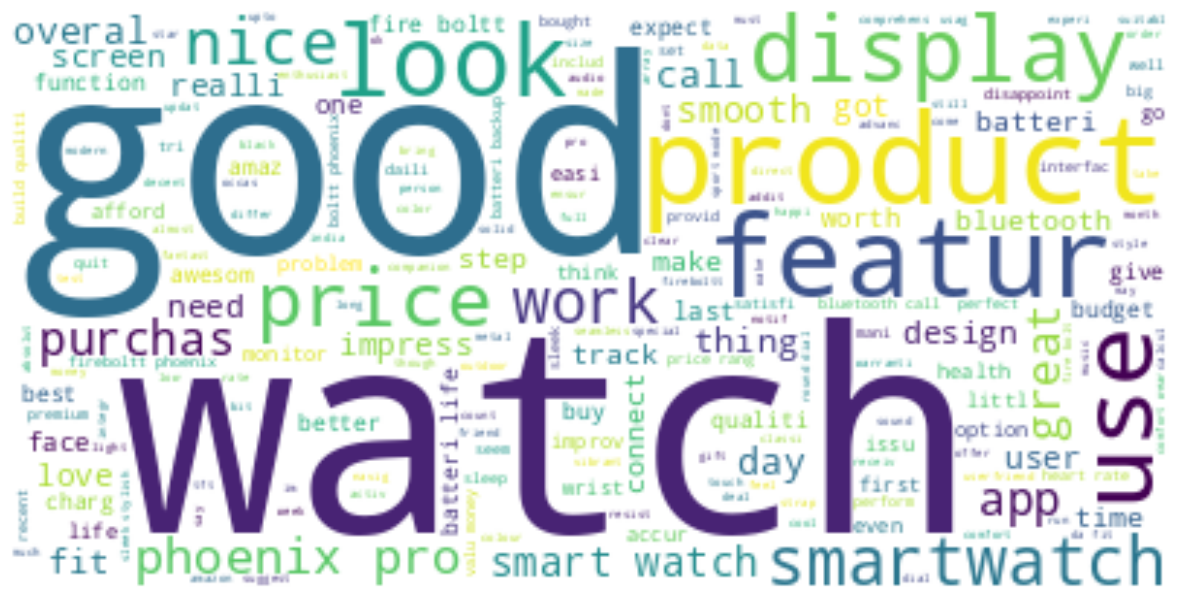

In [132]:
text = " ".join(i for i in data.Review_Content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [105]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review_Content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review_Content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review_Content"]]
data = data[["Review_Content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                      Review_Content  Positive  Negative  \
0  world technolog continu evolv smartwatch becom...     0.160     0.041   
1  bright okay doubl tap wake screen weak batteri...     0.399     0.071   
2  look classi worth  best budget round dial smar...     0.208     0.097   
3  like build qualiti featur also great price def...     0.445     0.058   
4  fireboltt phoenix pro good featur attract desi...     0.372     0.000   

   Neutral  
0    0.799  
1    0.530  
2    0.694  
3    0.497  
4    0.628  


In [106]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [107]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  32.538
Negative:  3.0860000000000003
Neutral:  64.37400000000001


In [135]:
review_content_df = data[['Review_Content']].copy()

In [149]:
review_content_df

,Review_Content
0,world technolog continu evolv smartwatch becom...
1,bright okay doubl tap wake screen weak batteri...
2,look classi worth best budget round dial smar...
3,like build qualiti featur also great price def...
4,fireboltt phoenix pro good featur attract desi...
...,...
95,good product fire boltt batteri life could bet...
96,overal good came need time use
97,purchas day work good
98,respons fast batteri life good


In [150]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### In Generic way of Doing things Im counting the most Common Words Used in the positive Reviews

In [170]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
# Combine all the text from the 'Review_Content' column into a single string
combined_text = ' '.join(data['Review_Content'])

# Tokenize the combined text into words
words = word_tokenize(combined_text)

# Remove punctuation and convert to lowercase
words = [word.lower() for word in words if word.isalnum()]

# Calculate word frequencies
word_freq = FreqDist(words)

# Display the most common words
most_common_words = word_freq.most_common(14)
for word, freq in most_common_words:
    print(f'{word}: {freq}')


watch: 87
good: 65
product: 45
featur: 36
use: 29
look: 27
display: 25
price: 23
batteri: 21
pro: 19
smartwatch: 17
call: 17
phoenix: 16
nice: 16


In [171]:
# Extract words and frequencies for the bar graph
words, freqs = zip(*most_common_words)

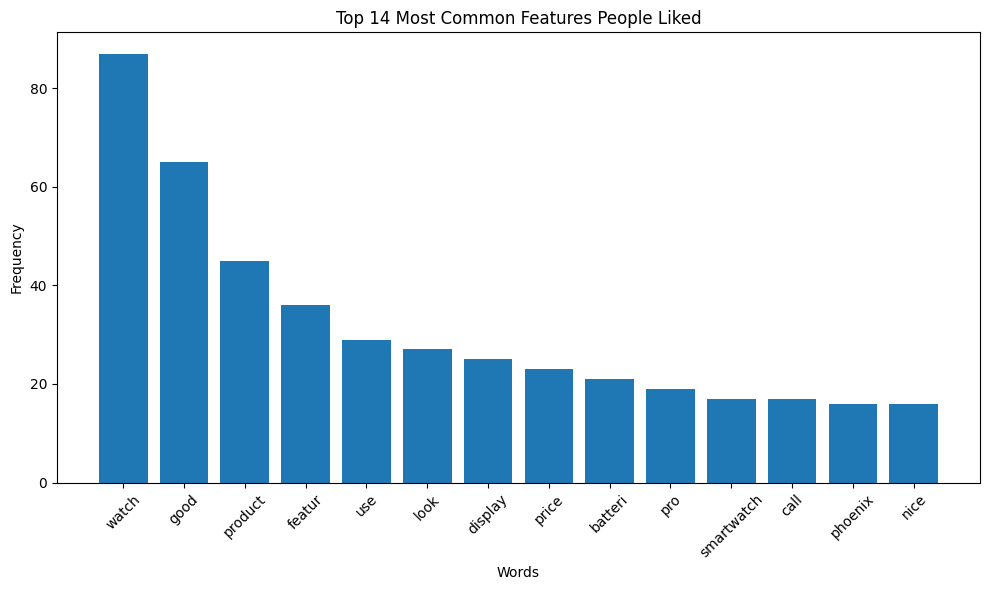

In [172]:


# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, freqs)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 14 Most Common Features People Liked')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar graph
plt.show()


# The neutral score of 64.374% is also positive; it indicates that 65% thought the product was okay, liked it, or found it usable.
# The negative score of 3.086% is understandable and acceptable for manufacturing defects or other issues.
# In conclusion, the product is most likely liked because people appreciated the following:
1.   Good Watch
2.   Good Product
3.   Feature-rich
4.   Good To USE
5.   Looks Good
6.   Display Is Good
7.   Price is Reasonable
8.   Good Battery Life
9.   Smartwatch With Call feature
10.  Pro Watch Features
